<a href="https://colab.research.google.com/github/MSsaraswathi/Codsoft/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [ ]:
train_df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
print("Train Data - Missing Values:")
print(train_df.isnull().sum())

Train Data - Missing Values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
def data_pre(X):
    del_col = ['merchant', 'first', 'last', 'street', 'zip', 'unix_time', 'Unnamed: 0', 'trans_num', 'cc_num']
    X.drop(columns=del_col, inplace=True)

    X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date'] = X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date'] = pd.to_datetime(X['trans_date'])

    X['dob'] = pd.to_datetime(X['dob'])

    # Calculate Age of each transaction
    X["age"] = (X["trans_date"] - X["dob"]).dt.days // 365

    X['trans_month'] = X['trans_date'].dt.month
    X['trans_year'] = X['trans_date'].dt.year

    X['gender'] = X['gender'].apply(lambda x: 1 if x == 'M' else 0)
    X['gender'] = X['gender'].astype(int)
    X['lat_dis'] = abs(X['lat'] - X['merch_lat'])
    X['long_dis'] = abs(X['long'] - X['merch_long'])
    X = pd.get_dummies(X, columns=['category'])

    # Ensure that both datasets have the same columns (e.g., handle missing categories)
    X = X.reindex(columns=train_df.columns, fill_value=0)

    return X

In [ ]:
x_train = data_pre(train_df.copy())
x_test = data_pre(test_df.copy())


In [ ]:
y_train = train_df['is_fraud']
y_test = test_df['is_fraud']

In [ ]:
numeric_cols = x_train.select_dtypes(include=['number']).columns
x_train = x_train[numeric_cols]
x_test = x_test[numeric_cols]

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_logistic = logistic_regression.predict(x_test)
y_pred_dt = decision_tree.predict(x_test)
y_pred_rf = random_forest.predict(x_test)

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      1.00      1.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      1.00      1.00    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      1.00      1.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      1.00      1.00    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      1.00      1.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      1.00      1.00    555719
weighted avg       1.00      1.00      1.00    555719



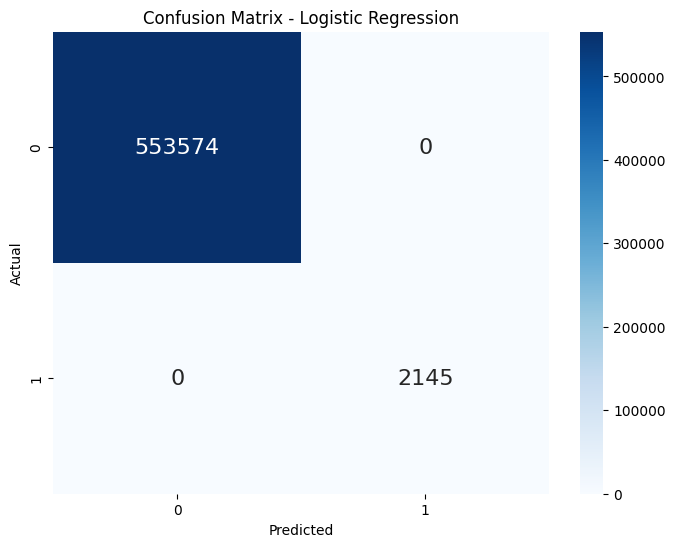

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



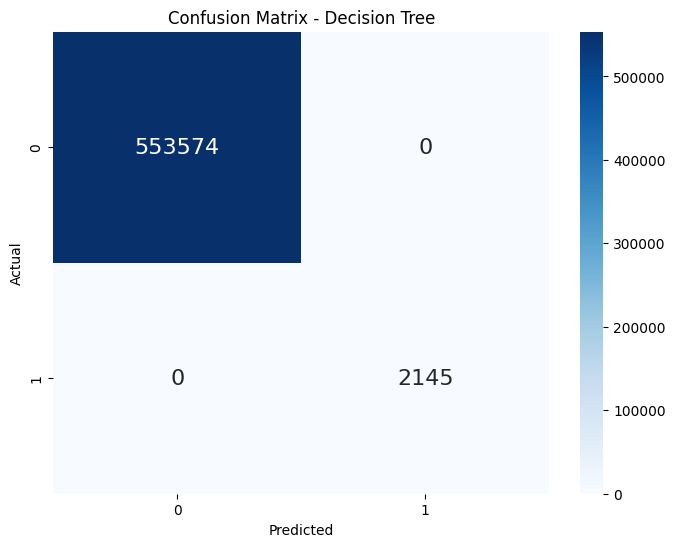

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

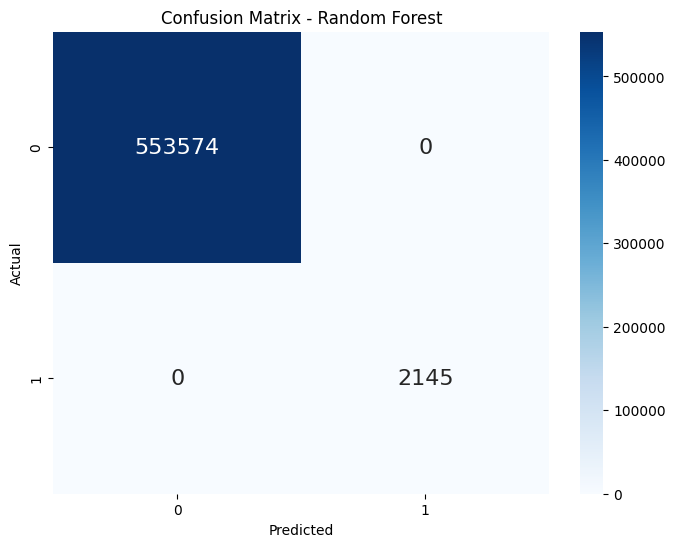

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()